In [1]:
#Load libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.utils import shuffle

In [2]:
#import the data
iris=datasets.load_iris()
X=iris.data
y=iris.target
names=iris.feature_names
X, y = shuffle(X,y, random_state=42)

In [3]:
#model
model=KMeans(n_clusters=3, random_state=42)
iris_kmeans=model.fit(X)

In [4]:
#The labels
iris_kmeans.labels_

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0,
       0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1,
       1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2])

In [5]:
import numpy as np
y=np.choose(y,[1,2,0]).astype(int)
y

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1,
       1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1,
       2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0,
       1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0])

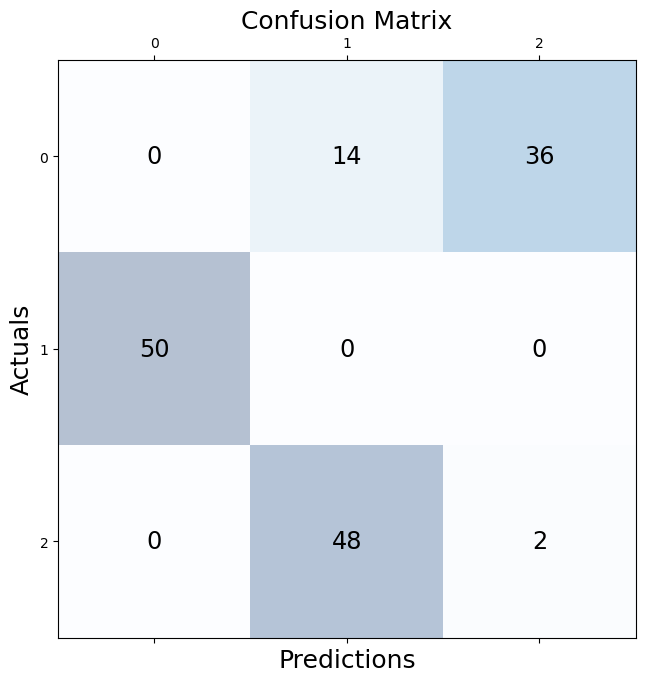

In [6]:
from sklearn.metrics import confusion_matrix
conf_matx=confusion_matrix(y,iris_kmeans.labels_)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matx, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matx.shape[0]):
    for j in range(conf_matx.shape[1]):
        ax.text(x=j, y=i,s=conf_matx[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

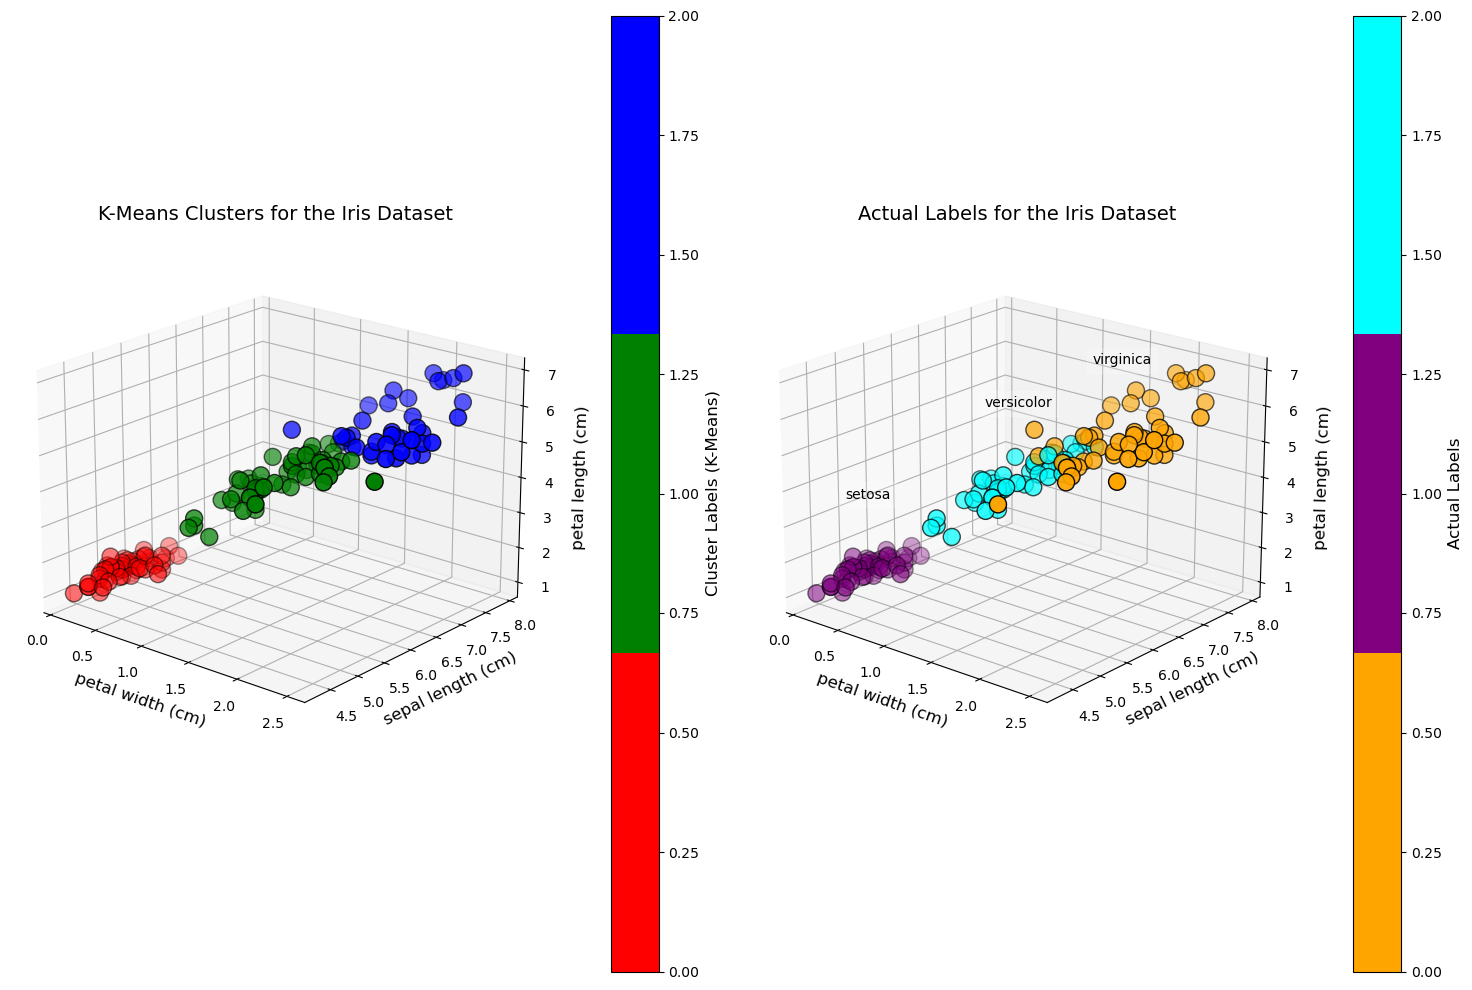

In [7]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D 

# Define custom colormaps
kmeans_cmap = ListedColormap(['red', 'green', 'blue'])  # For K-Means clusters
actual_cmap = ListedColormap(['orange', 'purple', 'cyan'])  # For actual labels

# Create the figure and subplots
fig = plt.figure(figsize=(15, 10))

# Subplot 1: K-Means Clusters
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
scatter1 = ax1.scatter(
    X[:, 3], X[:, 0], X[:, 2],
    c=iris_kmeans.labels_.astype(float),
    edgecolor="k", s=150, cmap=kmeans_cmap
)
ax1.view_init(20, -50)
ax1.set_xlabel(names[3], fontsize=12)
ax1.set_ylabel(names[0], fontsize=12)
ax1.set_zlabel(names[2], fontsize=12)
ax1.set_title("K-Means Clusters for the Iris Dataset", fontsize=14)
# Add colorbar for K-Means
cbar1 = plt.colorbar(scatter1, ax=ax1, pad=0.1)
cbar1.set_label("Cluster Labels (K-Means)", fontsize=12)

# Subplot 2: Actual Labels
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for label, name in enumerate(['virginica', 'setosa', 'versicolor']):
    ax2.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

scatter2 = ax2.scatter(
    X[:, 3], X[:, 0], X[:, 2],
    c=y, edgecolor="k", s=150, cmap=actual_cmap
)
ax2.view_init(20, -50)
ax2.set_xlabel(names[3], fontsize=12)
ax2.set_ylabel(names[0], fontsize=12)
ax2.set_zlabel(names[2], fontsize=12)
ax2.set_title("Actual Labels for the Iris Dataset", fontsize=14)
# Add colorbar for Actual Labels
cbar2 = plt.colorbar(scatter2, ax=ax2, pad=0.1)
cbar2.set_label("Actual Labels", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()